In [11]:
# Import libraries
import os

import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv(os.path.join('..', 'data', 'RedditNews_Results.csv'))

In [6]:
evaluation = pd.DataFrame(columns=['Model', 'AUC', 'GINI'])
def run_evaluation(y_test, y_pred, model):
    model = model
    # Calculate the error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    
    

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

NameError: name 'mae' is not defined

In [12]:
evaluate = pd.DataFrame(columns=['Model',
                                 'MAE', 
                                 'MSE',
                                 'RMSE',
                                 'MAPE',
#                                  'R2',
                                ])

def model_eval(model_name, y_pred, y_test, evaluate):
    evaluate = evaluate.append({'Model':model_name,
                               'MAE':mean_absolute_error(y_test, y_pred),
                               'MSE':mean_squared_error(y_test, y_pred),
                                'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                               'MAPE':mean_absolute_percentage_error(y_test,y_pred)
#                                'R2':r2_score(y_test,y_pred)},ignore_index=True
                               }, ignore_index = True)
    return evaluate

def viz_eval(y_pred, label):
    x_ax = range(len(y_pred))
    plt.scatter(x_ax, y_test, s=5, color="blue", label="Original")
    plt.plot(x_ax, y_pred, lw=0.8, color="red", label=label)
    plt.legend()
    plt.show()

In [13]:
df

,y_pred_FinBert,y_test_FinBert,y_pred_Vader,y_test_Vader
0,-0.006853,-0.004662,0.000410,-0.004662
1,-0.006142,-0.005849,0.000822,-0.005849
2,-0.005489,0.002145,0.001739,0.002145
3,-0.006660,-0.015381,0.000991,-0.015381
4,-0.004969,0.007781,0.002497,0.007781
...,...,...,...,...
333,-0.003252,-0.014971,0.002759,-0.014971
334,-0.003338,0.015722,0.003938,0.015722
335,-0.006754,0.016368,0.001743,0.016368
336,-0.008377,0.013298,0.000613,0.013298


In [14]:
evaluate = model_eval('Vader', df['y_pred_Vader'], df['y_test_Vader'] ,evaluate)
# evaluate = model_eval('Blob', pred['Blob'],evaluate)
evaluate = model_eval('FinBert', df['y_pred_FinBert'], df['y_test_FinBert'] ,evaluate)
evaluate= evaluate.sort_values("MAPE", ignore_index= True)
evaluate

C:\Users\duzzi\AppData\Local\Temp\ipykernel_16556\2910367458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluate = evaluate.append({'Model':model_name,
C:\Users\duzzi\AppData\Local\Temp\ipykernel_16556\2910367458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluate = evaluate.append({'Model':model_name,


,Model,MAE,MSE,RMSE,MAPE
0,Vader,0.007316,0.000097,0.009846,1.012805e+10
1,FinBert,0.009774,0.000143,0.011952,8.133887e+10


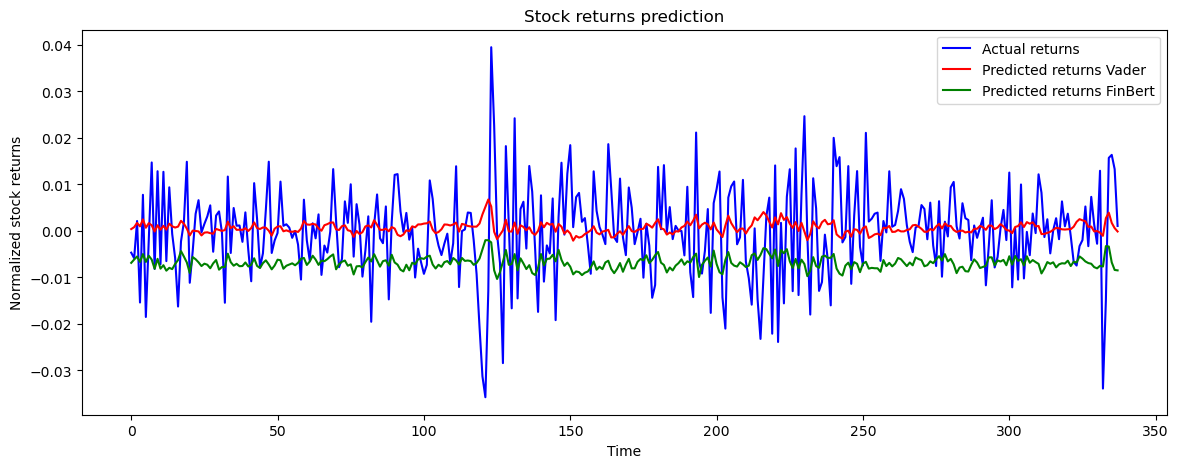

In [16]:
# Plot the actual and predicted returns
plt.figure(figsize=(14, 5))
plt.plot(df['y_test_Vader'], color='blue', label='Actual returns')
plt.plot(df['y_pred_Vader'], color='red', label='Predicted returns Vader')
# plt.plot(y_pred, color='green', label='Predicted returns Blob')
plt.plot(df['y_pred_FinBert'], color='green', label='Predicted returns FinBert')
plt.title('Stock returns prediction')
plt.xlabel('Time')
plt.ylabel('Normalized stock returns')
plt.legend()
plt.show()